In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
import statsmodels.api as sm
from scipy import stats

In [2]:
random_generation = np.random.default_rng(20201014)

# Warmup: Correlation (10%)

Below function is created to generate random numbers and draw the distribution for correlation between independed and dependent variables

In [3]:
def generate_correlation_plot(num_sample, num_iterations, draw_dependent_variable = False):
    # Seed for random number generation, it will ensure the results are reproduce
    random_generation = np.random.default_rng(20201014)
    
    corr = []
    for i in range(num_iterations):
        xs = pd.Series(random_generation.normal(size=num_sample))
        ys = pd.Series(random_generation.normal(size=num_sample))
        if draw_dependent_variable:
            zs = xs + ys
            corr.append(xs.corr(zs))
        else:
            corr.append(xs.corr(ys))
    
    coefficienct_mean = round(np.mean(corr),5)  
    coefficienct_variance = round(np.square(np.std(corr)),5)
    sns.histplot(corr)
    plt.xlabel(f'Correlation Coefficient')
    plt.title(f'For {num_sample} Samples and {num_iterations} Iterations\n Mean: {coefficienct_mean} & Variance: {coefficienct_variance}')

## Independent Variables

- Below 2 graphs show the distribution of the correlation coefficients between 2 independent variables drawn from a normal distribution.
- Since our draw is for independent variables, we are expecting a 0 correlation coefficients and hence 0 variance and histrogram distribution should be centred around 0.
    * When I draw 100 samples in each iteration for 1000 times, the mean of correlation coefficients is not 0 however quite less (-0.00216) and the variance is (0.01028).
    * When I draw 1000 samples in each iterations for 1000 times, the mean is (-0.00052) and variance is (0.00102) which is significantly less for sample size of 100 but still not 0. However, the distribution has less variance and concentrated around mean.
    
From the above experiement, I can say, if we keep on drawing more samples in one iteration, then the mean of the correlation coefficient will be very much closer to 0 and will have almost insignificant variance. This aligns with definition of the independent random variables.

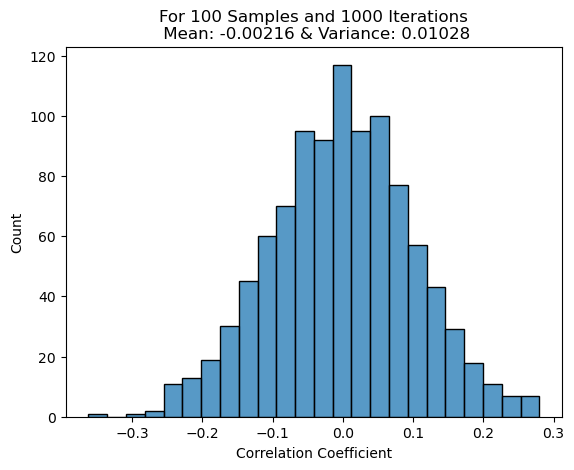

In [4]:
NUM_ITERATIONS = 1000
sample_size = 100
generate_correlation_plot(sample_size, NUM_ITERATIONS)

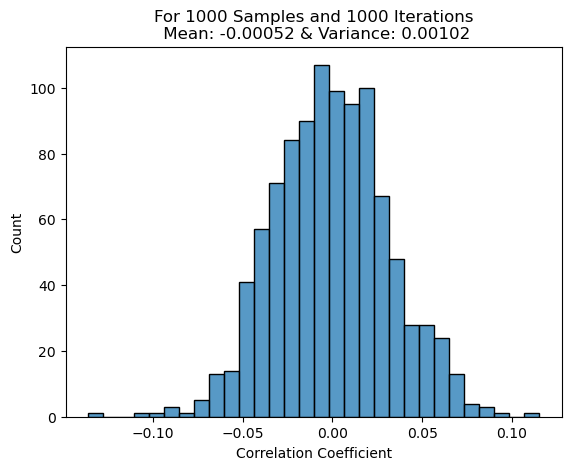

In [5]:
sample_size = 1000
generate_correlation_plot(sample_size, NUM_ITERATIONS)

## Dependent Variables

- Below I am plotting the distribution between two dependent variables `xs, and zs`. The `zs = xs + ys`. Since, `zs` is linearly dependent on `xs` and positively related i.e. change in one's value for example if it increases the dependent variable's value also increase.
- Since, the `xs & zs` are positively linked, so we are expecting `correlatin coefficient > 0` and I am expecting a strong correlation between these 2, so mean value of the correlation coefficient should be closer to 1 but not 1 as `zs` is dependent on `ys` as well.
    * Like independe variables, I draw 2 different sample sizes 100 & 1000 for 1000 iterations. In both of the distributions, the mean value is almost same and the variance is also the same.
    * Also, the both distributions are centred around mean (0.70) and an less significant variance. This suggestes, even if I keep on increasing the sample size, the mean value will be around (0.70).
    

For the above experiement, I can say the dependent variable will have non-zero correlation coefficient and will indicate the dependency of a variable with magnitude of the mean value

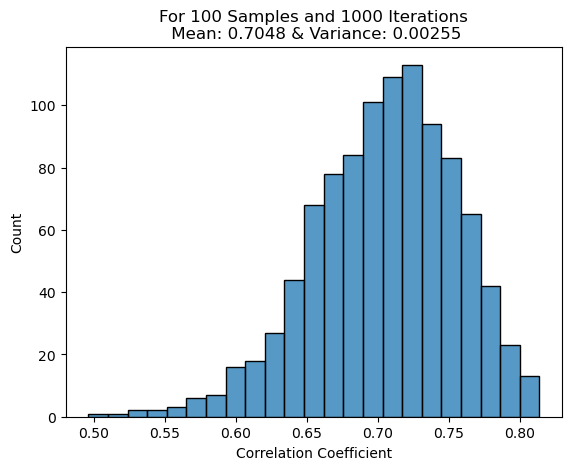

In [6]:
sample_size = 100
generate_correlation_plot(sample_size, NUM_ITERATIONS, draw_dependent_variable = True)

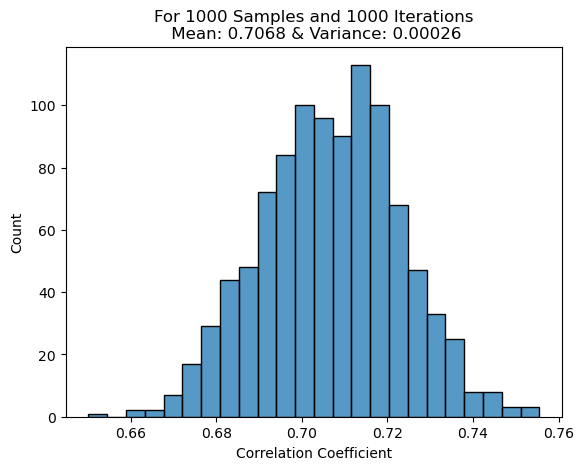

In [7]:
sample_size = 1000
generate_correlation_plot(sample_size, NUM_ITERATIONS, draw_dependent_variable = True)

In [8]:
# Since everywhere sample size is fixed to 1000, I am defining here
sample_size = 1000

# Linear Regression (35%)

$y = \alpha + \beta x + \epsilon$

In [9]:
def linear_regression(num_sample, slope, intercept, is_single_fit = True):
    random_generaton = np.random.default_rng(20201014)
    # Generate Independent variable samples from a standard normal distribution
    xs = random_generation.standard_normal(num_sample)
    # Generate the random i.i.d noise    
    errs = random_generation.standard_normal(num_sample)
    # Generate the Dependent variable using Independent Variable, noise, slope, and intercept        
    ys = intercept + slope * xs + errs
    
    df = pd.DataFrame({'X':xs, 'Y':ys})
    X = df['X']
    Y = df['Y']
    X = sm.add_constant(X)
    ols_model = sm.OLS(Y, X).fit()
    ols_summary = ols_model.summary()
    if is_single_fit:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

        # Plot the residual vs. fitted plot
        fitted_values = ols_model.fittedvalues
        residuals = ols_model.resid
        axes[0].scatter(fitted_values, residuals)
        axes[0].set_title("Residuals vs. Fitted")
        axes[0].set_xlabel("Fitted Values")
        axes[0].set_ylabel("Residuals")
        axes[0].axhline(y=0, color='r', linestyle='-')


        sm.qqplot(residuals, line='45', ax=axes[1])
        axes[1].set_title("Q-Q Plot of Residuals")

        plt.show()

        print(ols_summary)
        
        return None
    else:
        fitted_slope = ols_model.params['X']
        fitted_intercept = ols_model.params['const']
        mdl_rsquared = ols_model.rsquared
        
        return fitted_slope, fitted_intercept, mdl_rsquared

## Linear Regression for (1 : slope,0 : intercept) 1,000 Samples

- Below I have fitted an OLS model for 1000 random samples generated for independent variable `X`.
- I have used `$Y = 1*X + 0 + \epsilon$` to generate the dependent variable `Y` with i.i.d normal noise `$\epsilon$`.


- The I fitted the `X` on `Y` using OLS model. The fitted model shows that:
    * 53.8% of the variance in "Y" is explained by "X" as indicated from __R-squared__. It may be noted here, since there is only one independent variable, hence __Adj. R-squared__ is nearly same as __R-squared__
    * The low __p-value__ and high __F-statistic__ values indicate that this model is statistically significant which was expected as `Y` is dependent on `X` only other than the noise.
    * The model estimates the Coefficient for `X` __(slope)__ is 1.0249 with a standard error of 0.030. This is closer to my given slope 1 and lowe p-value for X also indicates this coefficient is significant, which is again true. As my actual slope is 1.
    * Further as expected, the const __(intercept)__ is not statistically significant as p-value is 0.601.
    * Confidence Interval: The 95% confidence interval for the coefficient of "X" is (0.966, 1.084).
    
In summary, this OLS regression model is statistically significant, and the coefficient for "X" is estimated to be 1.0256, suggesting a significant relationship between "X" and "Y." The model explains 53.8% of the variance in "Y," and various diagnostic tests have been performed to assess the model's quality.

- From Residul and Q-Q plots, we can say:
    * Since the _Q-Q plot_ closely follow a straight diagonal line, it suggests that the residuals are normally distributed.
    * From _Residals vs Fitted graph_, we can say the residuals are scattered around horizontal line suggesting the linearity assumption holds true.
    * Also from _Residals vs Fitted_, the lack of any pattern among residuals scatter plot implies that Homoscedasticity assumption holds true

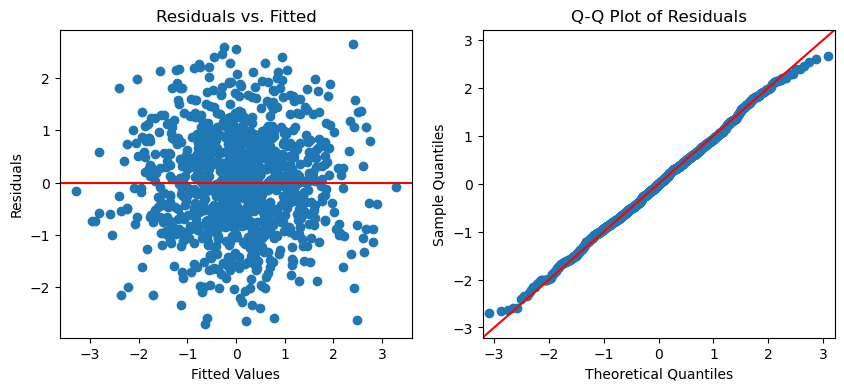

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1160.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          2.42e-169
Time:                        21:19:08   Log-Likelihood:                -1380.7
No. Observations:                1000   AIC:                             2765.
Df Residuals:                     998   BIC:                             2775.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0160      0.031      0.523      0.6

In [10]:
linear_regression(sample_size, 1, 0)

In [11]:
def run_linear_regression_simulation(num_sample, slope, intercept, num_iterations):
    slopes = []
    intercepts = []
    rsquareds = []
    for i in range(num_iterations):
        fit_slope, fit_intercept, rsquared = linear_regression(num_sample, slope, intercept, is_single_fit=False)
        slopes.append(fit_slope)
        intercepts.append(fit_intercept)
        rsquareds.append(rsquared)
    
    slope_mean = round(np.mean(slopes),5)
    intercept_mean = round(np.mean(intercepts),5)
    rsquared_mean = round(np.mean(rsquareds),5)
    
    slope_variance = round( np.square(np.std(slopes)),5 )
    intercept_variance = round( np.square(np.std(intercepts)),5 )
    rsquared_variance = round( np.square(np.std(rsquareds)),5 )
    
    fig, axs = plt.subplots(1,3, figsize=(12, 4))
    
    sns.histplot(slopes, ax=axs[0])
    axs[0].set_title(f'Slopes Distribution\n Mean:{slope_mean} & Variance:{slope_variance}')
    
    sns.histplot(intercepts, ax=axs[1])
    axs[1].set_title(f'Intercepet Distribution\n Mean:{intercept_mean} & Variance:{intercept_variance}')
    
    sns.histplot(rsquareds, ax=axs[2])
    axs[2].set_title(f'R-Squared Distribution\n Mean:{rsquared_mean} & Variance:{rsquared_variance}')

    # Add labels and a title for the entire figure
    plt.xlabel('Value')
    plt.tight_layout()
    plt.show()


## Linear Regression for  (1 : slope,0 : intercept)  1,000 Samples & 1,000 simulations

- By running the above linear regression fit for 1000 times, I can that:
    * The mean coefficient is distributed around 1 with an insignificant variance aligning with the expectations.
    * The mean intercept is distributed around 0 with very low variance thus aligning with the excpetations.
    * ~50% of the variances in `Y` are explained by `X`

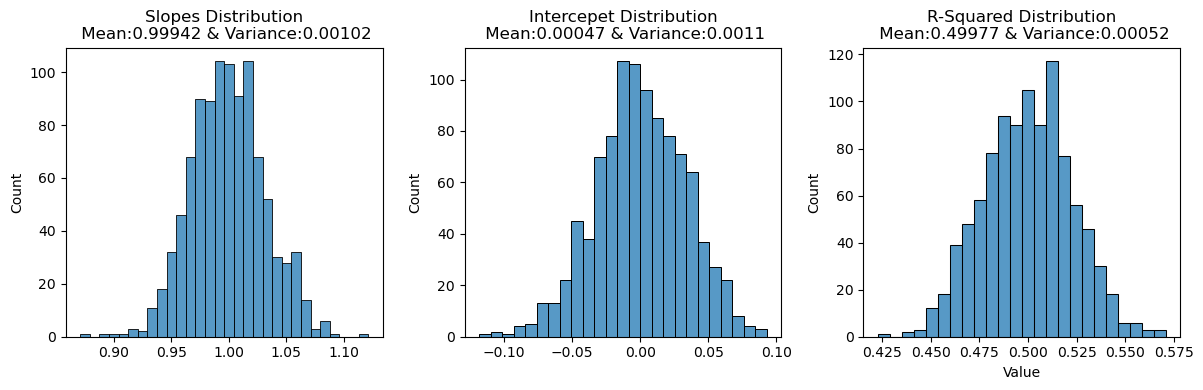

In [12]:
run_linear_regression_simulation(sample_size, 1, 0, 1000)

## Linear Regression for (4 : slope,1 : intercept) 1,000 Samples & 1,000 simulations

* Are the resulting model parameters what you expect? 
    - Yes, the result model parameters aligns with the expectation. My __intercept__ was 1 and model has predicted it to be 0.9572 with 95% confidence lying between [0.896       1.018] and this time the predicted intercept is significant (low p-value) again aligns with expectations.
    - The coefficient of `X`__(slope)__ also matches the expectation as 95% confidence iterval is [3.993       4.117] with a predicted value very close to given slope = 4

* How did $R^2$ change, and why?
    - Now, ~95% of the variance in `Y` has been explained. This is because the coefficients for both the constant __(intercept)__ and the independent variable `X` __(slope)__ are higher, which suggests a stronger relationship between the two variables. This results in a higher R-squared value, indicating a better fit of the model to the data suggesting the choice of independent variables and their coefficients can have a significant impact on the R-squared value in regression analysis.

* Do the linear model assumptions still hold?
    - Yes, the _'Q-Q plot'_ and _'Residuals vs Fitted'_ are very much similar to the previous model thus suggesting that all these assumptions still hold

* What are the distributions of the slope, intercept, and $R^2$ if you do this 1000 times?
    - The distributions of slope, intercept, and R-Squared is also similar to previous fit model with 1,0 slope and intercept respectively. 
    - The slope and intercept are very much close to the given values (4 & 1) with no significant variance in these.
    - Also, the mean R-Squared value is ~94% i.e. majority of the variance in `Y` is explained by the model

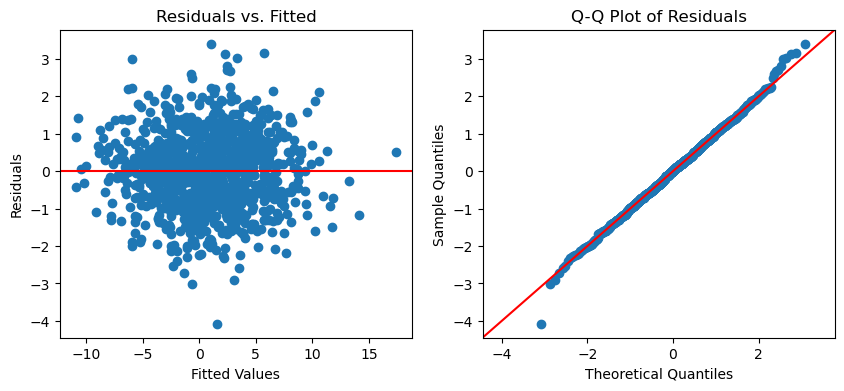

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.673e+04
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:19:10   Log-Likelihood:                -1428.1
No. Observations:                1000   AIC:                             2860.
Df Residuals:                     998   BIC:                             2870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0099      0.032     31.546      0.0

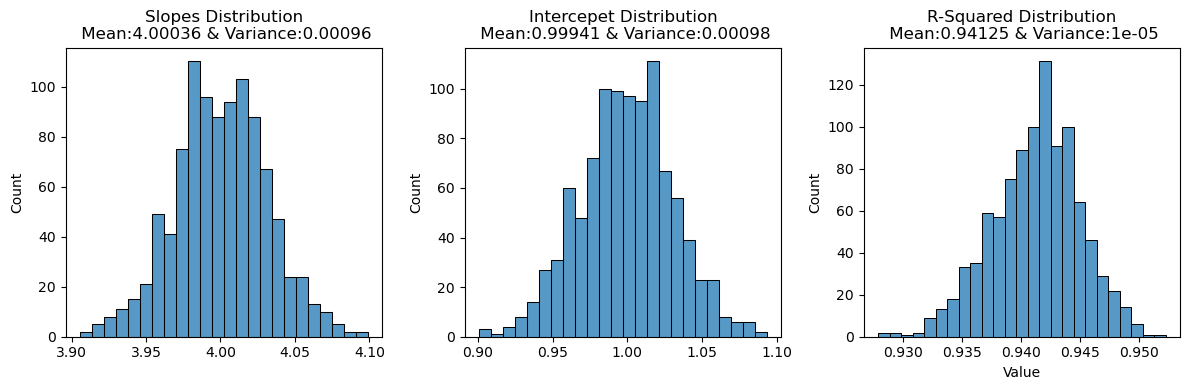

In [13]:
linear_regression(sample_size, 4, 1)
run_linear_regression_simulation(sample_size, 4, 1, 1000)

Redefined a function to fit linear model to generate sample from Normal distribution with given parameters

In [14]:
def linear_regression_normal(num_sample, slope, intercept, normal_mean, normal_std, normal_std_err):
    random_generaton = np.random.default_rng(20201014)
    # Generate Independent variable samples from a standard normal distribution
    xs = random_generation.normal(loc= normal_mean, scale= normal_std, size= num_sample)
    # Generate the random i.i.d noise    
    errs = random_generation.normal(loc= normal_mean, scale= normal_std_err, size= num_sample)
    # Generate the Dependent variable using Independent Variable, noise, slope, and intercept        
    ys = intercept + slope * xs + errs
    
    df = pd.DataFrame({'X':xs, 'Y':ys})
    X = df['X']
    Y = df['Y']
    X = sm.add_constant(X)
    ols_model = sm.OLS(Y, X).fit()
    ols_summary = ols_model.summary()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    # Plot the residual vs. fitted plot
    fitted_values = ols_model.fittedvalues
    residuals = ols_model.resid
    axes[0].scatter(fitted_values, residuals)
    axes[0].set_title("Residuals vs. Fitted")
    axes[0].set_xlabel("Fitted Values")
    axes[0].set_ylabel("Residuals")
    axes[0].axhline(y=0, color='r', linestyle='-')


    sm.qqplot(residuals, line='45', ax=axes[1])
    axes[1].set_title("Q-Q Plot of Residuals")

    plt.show()

    print(ols_summary)

## Linear Regression for (-2 : slope,5 : intercept) 1,000 Samples

- Are the resulting model parameters what you expect? What about the $R^2$?

    * The resulting parameters of the model are _intercept = 4.8747_ and _slope = -2.0774_ and these predicted parameters are statistically signifcant because of low p-value. These values are quite closer to the actual values (5 & -2) with a standard error of ~.15 in both
    * The R-squared value is ~15% i.e. only 15% of the variance in `Y` are explained in this model and moreover F-statistic is low compared to the above models, hence this model seems not statistically significant.
    
    
<br>

- Do the linear model assumptions still hold?
    * _Q-Q Plot_ clearly indicates deviation in Sample vs Theoretical qunantities. The deviation of residuals from the diagonal line indicates that the residuals are not normally distributed. There the assumpation of Residuals are normally distributed does not hold true.
    * However from the _'Residuals vs Fitted'_ plot, other assumptions related to residuals' Homoscedasticity, Linearity, and Independence assumptions still hold true

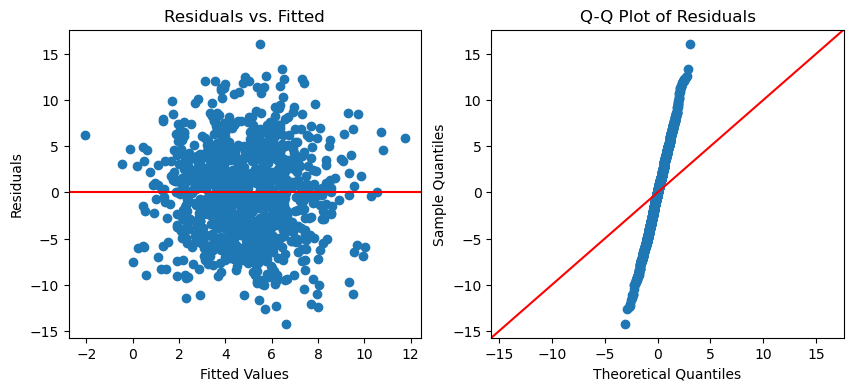

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     151.6
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.55e-32
Time:                        21:19:12   Log-Likelihood:                -3004.2
No. Observations:                1000   AIC:                             6012.
Df Residuals:                     998   BIC:                             6022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9303      0.155     31.904      0.0

In [15]:
linear_regression_normal(sample_size, -2, 5, 0, 1, 5)

# Nonlinear Data (15%)

###  Generate 1000 data points with the following distributions and formula:

$$\begin{align*} x & \sim \mathrm{Normal}(0, 1) \\ \epsilon & \sim \mathrm{Normal}(0, 5) \\ y & = 10 + 5 e^x + \epsilon \end{align*}$$

In [16]:
xs = random_generation.normal(loc= 0, scale= 1, size= sample_size)
epsilon = random_generation.normal(loc= 0, scale= 5, size= sample_size)
ys = 10 + 5*np.exp(xs) + epsilon

## Fit a linear model predicting $y$ with $x$

- How well does the model fit? 
    * The R-squared value is 0.503, which indicates that approximately 50.3% of the variance in `ys` can be explained by `xs`. This suggests that the model explains only a moderate amount of the variance in the data.
    * The F-statistic is 1012 and the associated p-value is very close to zero suggesting that `ys` is significantly related to `xs` indicating that the model as a whole is statistically significant.
    * The coefficient for `xs` is 8.3291, and it is statistically significant and similarly the _intercept_ value is 18.1970 and is also statistically significant.

This model has an R-squared value that indicates a moderate fit. While it's a linear regression model, it's possible that the relationship between `ys` and `xs` may not be perfectly linear, especially given the low p-values and relatively high coefficient values.
    
<br>

- Do the assumptions seem to hold?
    * From _Q-Q Plot_ it's evident that the residuals are not normally distributed hence the assumption of Residuals are normally distributed doesn't hold true for this model.
    * Also from _'Residuals vs Fitted'_ plot, I can see a clear pattern between residulas around the predicted values. So the Linearity and Homoscedasticity doesn't hold true

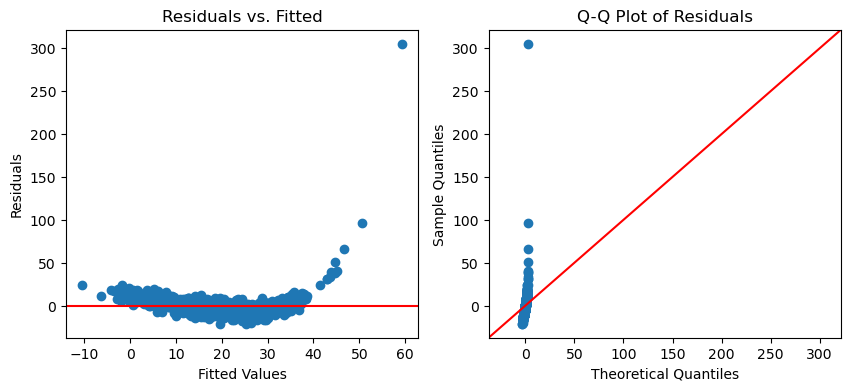

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     550.1
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           3.01e-97
Time:                        21:19:12   Log-Likelihood:                -3970.8
No. Observations:                1000   AIC:                             7946.
Df Residuals:                     998   BIC:                             7955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4022      0.406     45.303      0.0

In [17]:
xs = sm.add_constant(xs)
ols_model = sm.OLS(ys, xs).fit()
ols_summary = ols_model.summary()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the residual vs. fitted plot
fitted_values = ols_model.fittedvalues
residuals = ols_model.resid
axes[0].scatter(fitted_values, residuals)
axes[0].set_title("Residuals vs. Fitted")
axes[0].set_xlabel("Fitted Values")
axes[0].set_ylabel("Residuals")
axes[0].axhline(y=0, color='r', linestyle='-')


sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.show()

print(ols_summary)

### Draw a scatter plot of $x$ and $y$.

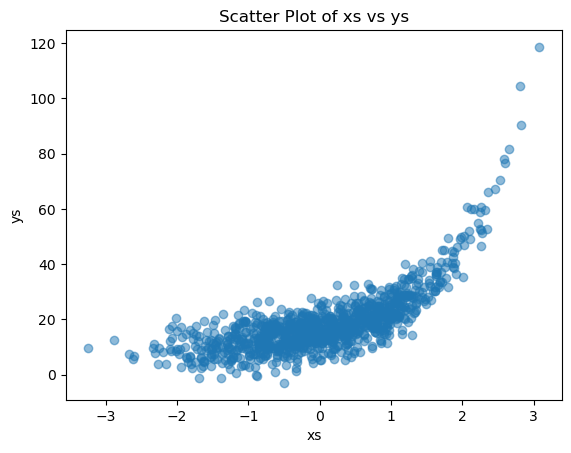

In [18]:
xs = random_generation.normal(loc= 0, scale= 1, size= sample_size)
epsilon = random_generation.normal(loc= 0, scale= 5, size= sample_size)
ys = 10 + 5*np.exp(xs) + epsilon

plt.scatter(xs, ys, alpha=0.5)
plt.title('Scatter Plot of xs vs ys')
plt.xlabel('xs')
plt.ylabel('ys')

# Display the plot
plt.show()

### Repeat with $y = -2 + 3 x^3 + \epsilon$

Similar to the above equation $y & = 10 + 5 e^x + \epsilon$, this model also doesn't hold all the assumption true and shows some non-linear relationship between `ys` and `xs` which is also evident from the scatter plotted below.

- How well does the model fit? 
    * The R-squared value is 0.495, which indicates that approximately 49.5% of the variance in `ys` can be explained by `xs`. This suggests that the model explains only a moderate amount of the variance in the data.
    * The F-statistic is 978.4 and the associated p-value is very close to zero suggesting that `ys` is significantly related to `xs` indicating that the model as a whole is statistically significant.
    * The coefficient for `xs` is 8.861, and it is statistically significant and similarly the _intercept_ value is -2.0738 and is also statistically significant.

This model has an R-squared value that indicates a moderate fit. While it's a linear regression model, it's possible that the relationship between `ys` and `xs` may not be perfectly linear, especially given the low p-values and relatively high coefficient values.
    
<br>

- Do the assumptions seem to hold?
    * From _Q-Q Plot_ it's evident that the residuals are not normally distributed hence the assumption of Residuals are normally distributed doesn't hold true for this model.
    * Also from _'Residuals vs Fitted'_ plot, I can see a clear pattern between residulas around the predicted values. So the Linearity and Homoscedasticity doesn't hold true

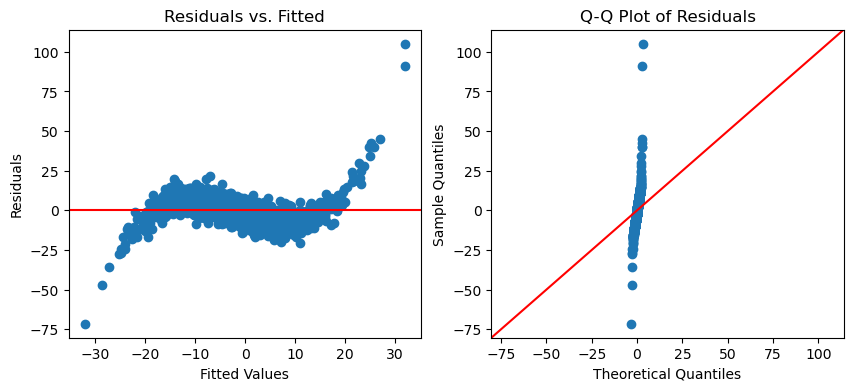

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1057.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          1.07e-158
Time:                        21:19:13   Log-Likelihood:                -3684.0
No. Observations:                1000   AIC:                             7372.
Df Residuals:                     998   BIC:                             7382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4855      0.305     -4.872      0.0

In [19]:
xs = random_generation.normal(loc= 0, scale= 1, size= sample_size)
epsilon = random_generation.normal(loc= 0, scale= 5, size= sample_size)
ys = -2 + 3*np.power(xs, 3) + epsilon

xs = sm.add_constant(xs)
ols_model = sm.OLS(ys, xs).fit()
ols_summary = ols_model.summary()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the residual vs. fitted plot
fitted_values = ols_model.fittedvalues
residuals = ols_model.resid
axes[0].scatter(fitted_values, residuals)
axes[0].set_title("Residuals vs. Fitted")
axes[0].set_xlabel("Fitted Values")
axes[0].set_ylabel("Residuals")
axes[0].axhline(y=0, color='r', linestyle='-')


sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.show()

print(ols_summary)

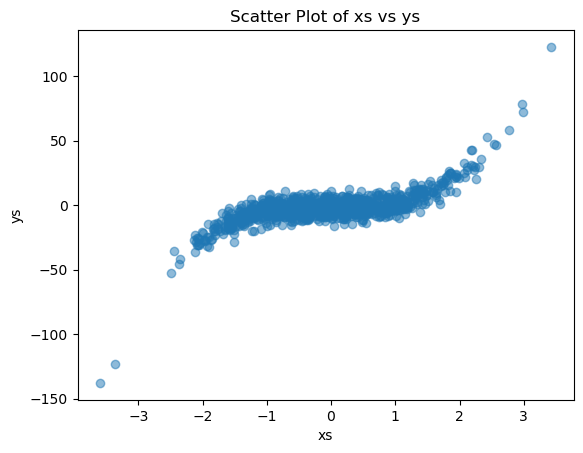

In [20]:
xs = random_generation.normal(loc= 0, scale= 1, size= sample_size)
epsilon = random_generation.normal(loc= 0, scale= 5, size= sample_size)
ys = -2 + 3*np.power(xs, 3) + epsilon

plt.scatter(xs, ys, alpha=0.5)
plt.title('Scatter Plot of xs vs ys')
plt.xlabel('xs')
plt.ylabel('ys')

# Display the plot
plt.show()

# Non-Normal Covariates (15%)

### Generate 1000 data points with the model:
$$\begin{align*} y & = -10 + 5 x + \epsilon \\ \epsilon & \sim \mathrm{Normal}(0, 30) \\ x & \sim \mathrm{Uniform}(0, 100) \end{align*}$$

In [21]:
xs = random_generation.uniform(0,100,sample_size)
epsilon = random_generation.normal(loc= 0, scale= 30, size= sample_size)
ys = -10 + 5*xs + epsilon

##### Plot the distributions of $X$ and $Y$

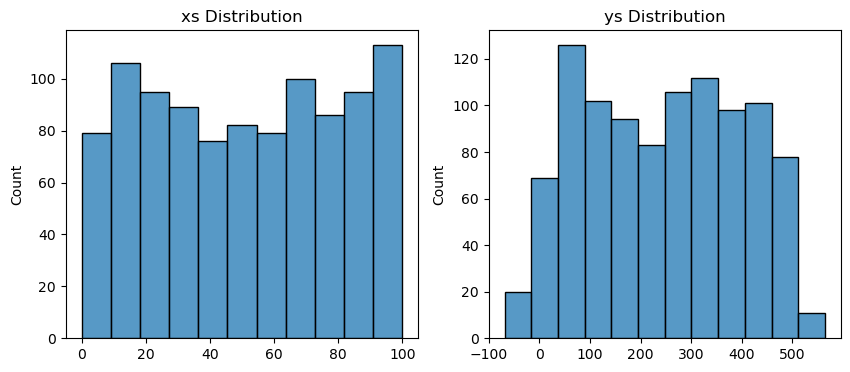

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the residual vs. fitted plot
sns.histplot(xs, ax=axes[0])
axes[0].set_title("xs Distribution")

sns.histplot(ys, ax=axes[1])
axes[1].set_title("ys Distribution")

plt.show()

##### Fit a linear model predicting $y$ with $x$

- How well does this model fit? How much of the variance does it explain?
    * The models explains the 95.7% variance in `ys` with high statistical significance of the model i.e. dependency of `ys` on `xs`. 
    * The coefficient of `xs` __(slope)__ is predicted to be 5.0413 quite closer to actual coefficient with a standard error of 0.034. However the standard error in the __intercept__ is quite high (1.895) though the value is quite near to the actual one. Both the predicted parameters are statistically significant.
    
<br>

- Do the assumptions seem to hold?
    * From the _Q-Q Plot_ there is a clear violation of assumption that Residuals are normally distributed.
    * Also, _Residual vs Fitted_ plot exhibit some kind of linear trend between the residuals and the predicted values hence other assumptions doesn't seem hold true
    
<br>

- Does the linear regression seem appropriate to the data?
    * No, this linear regression doesn't seem appropriate as the Residuals are not normally distributed and also show a linear trend with the predicted value.
<br>


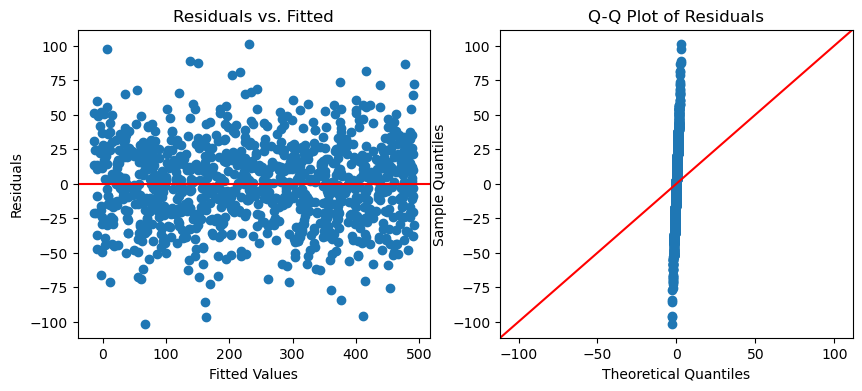

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 2.498e+04
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:19:13   Log-Likelihood:                -4817.7
No. Observations:                1000   AIC:                             9639.
Df Residuals:                     998   BIC:                             9649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3934      1.892     -7.608      0.0

In [23]:
xs = sm.add_constant(xs)
ols_model = sm.OLS(ys, xs).fit()
ols_summary = ols_model.summary()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the residual vs. fitted plot
fitted_values = ols_model.fittedvalues
residuals = ols_model.resid
axes[0].scatter(fitted_values, residuals)
axes[0].set_title("Residuals vs. Fitted")
axes[0].set_xlabel("Fitted Values")
axes[0].set_ylabel("Residuals")
axes[0].axhline(y=0, color='r', linestyle='-')


sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.show()

print(ols_summary)

### Generate 1000 data points with the model:

$$\begin{align*} y & = 10 + 2x + \epsilon \\ \epsilon & \sim \mathrm{Normal}(0, 1) \\ x & \sim \mathrm{Exponential}(5) \end{align*}$$

In [24]:
xs = random_generation.exponential(scale= 5, size = sample_size)
epsilon = random_generation.normal(loc= 0, scale= 1, size= sample_size)
ys = 10 + 2*xs + epsilon

##### Plot the distributions of $X$ and $Y$

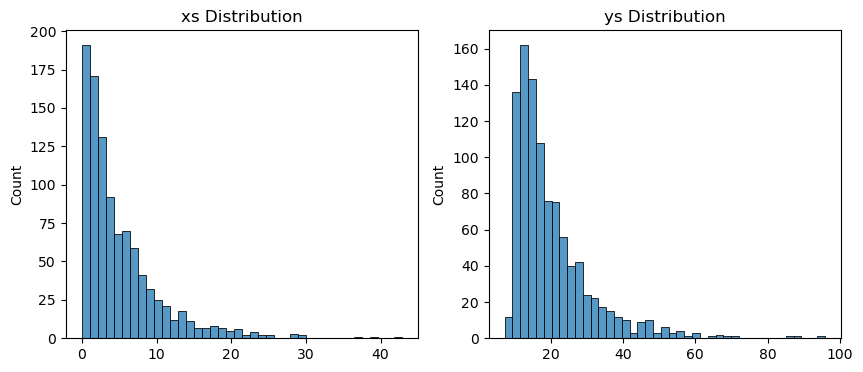

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the residual vs. fitted plot
sns.histplot(xs, ax=axes[0])
axes[0].set_title("xs Distribution")

sns.histplot(ys, ax=axes[1])
axes[1].set_title("ys Distribution")

plt.show()

##### Fit a linear model predicting $y$ with $x$

- How well does this model fit? How much of the variance does it explain?
    * The models explains the 98.9% variance in `ys` with high statistical significance of the model i.e. dependency of `ys` on `xs`. 
    * The coefficient of `xs` __(slope)__ is predicted to be 1.9896 quite closer to actual coefficient with a standard error of 0.007 which is quite low. The __intercept__ also is close to the actual value with substantially a low standard error. Both of the predicted parameters are statistically significant
    
<br>

- Do the assumptions seem to hold?
    * The _Q-Q Plot_ doesn't show much deviation from the diagnoal line, so it seems like the residuals are normally distributed.
    * However the _Residual vs Fitted_ plot exhibit a clear trend in residuals (all residuals are skewed to the left) thus exhibiting the relationship between resiudals. Hence, Homoscedasticity assumption doesn't hold true and also the residuals doesn't seem independent as well
    
<br>

- Does the linear regression seem appropriate to the data?
    * No, this linear regression doesn't seem appropriate as the Residuals are not normally distributed and also show a linear trend with the predicted value. Although the fitted model explains a significant variance in the `ys`
<br>


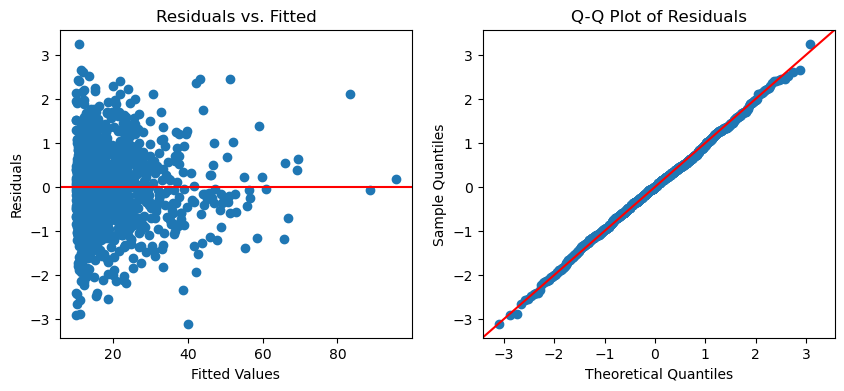

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.257e+05
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:19:13   Log-Likelihood:                -1380.4
No. Observations:                1000   AIC:                             2765.
Df Residuals:                     998   BIC:                             2775.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0064      0.042    239.508      0.0

In [26]:
xs = sm.add_constant(xs)
ols_model = sm.OLS(ys, xs).fit()
ols_summary = ols_model.summary()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the residual vs. fitted plot
fitted_values = ols_model.fittedvalues
residuals = ols_model.resid
axes[0].scatter(fitted_values, residuals)
axes[0].set_title("Residuals vs. Fitted")
axes[0].set_xlabel("Fitted Values")
axes[0].set_ylabel("Residuals")
axes[0].axhline(y=0, color='r', linestyle='-')


sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.show()

print(ols_summary)

# Multiple Regression (10%)

$$\begin{align*} x_1 & \sim \mathrm{Normal}(10, 2) \\ x_2 & \sim \mathrm{Normal}(-2, 5) \\ \epsilon & \sim \mathrm{Normal}(0, 1) \\ y & = 1 + 0.5 x_1 + 3 x_2 + \epsilon \end{align*}$$


- What are the intercept and coefficients from the model? Are they what you expect? 
    * The model explains 99.6% variance in the `ys` variable and the model is statistically significant as well.
    * The predicted values for the parameters are as below:
        - `x1` --> 0.5195 with standard error 0.016. The actual value is .5
        - `x2` --> 2.9928 with standard error 0.016. The actual value is 3
        - `intercept` --> 0.8192 with standard error 0.162. The actual value is 1<br>
        
      The predicted values for `x1 and x2` are quite close to the actual values and all the predicted parameters are statistically significant. The intecept predicted value is quite far from the actual value with significantly higher standard error as well. This might be an indication for that model shows dependency on `x1 & x2` more rather than the intecept
    
<br>

- Check the model assumptions — do they hold?
    * All the assumptions for this model seems to hold true as _Q-Q Plot_ shows no deviation and _Residual vs Fitted_ plot also doens't show any sign that might indicate any assumption being violated.
<br>


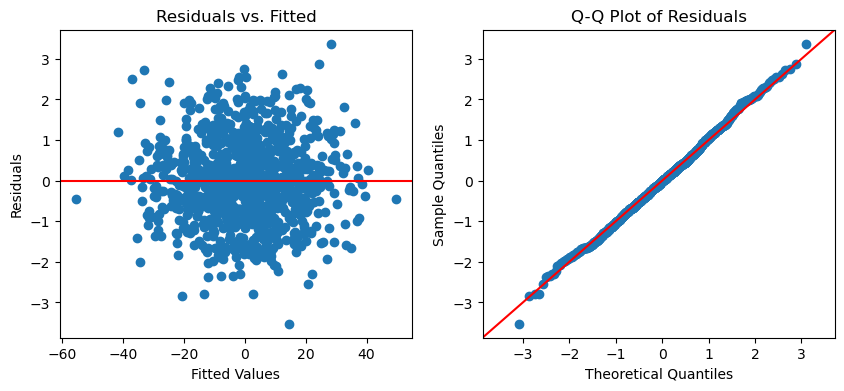

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.089e+05
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:19:13   Log-Likelihood:                -1440.5
No. Observations:                1000   AIC:                             2887.
Df Residuals:                     997   BIC:                             2902.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0962      0.167      6.577      0.0

In [27]:
xs1 = random_generation.normal(loc= 10, scale= 2, size= sample_size)
xs2 = random_generation.normal(loc= -2, scale= 5, size= sample_size)
epsilon = random_generation.normal(loc= 0, scale= 1, size= sample_size)
ys = 1 + 0.5*xs1 + 3*xs2 + epsilon

X = sm.add_constant(np.column_stack((xs1, xs2)))

ols_model = sm.OLS(ys, X).fit()
ols_summary = ols_model.summary()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the residual vs. fitted plot
fitted_values = ols_model.fittedvalues
residuals = ols_model.resid
axes[0].scatter(fitted_values, residuals)
axes[0].set_title("Residuals vs. Fitted")
axes[0].set_xlabel("Fitted Values")
axes[0].set_ylabel("Residuals")
axes[0].axhline(y=0, color='r', linestyle='-')


sm.qqplot(residuals, line='45', ax=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.show()

print(ols_summary)

# Correlated Predictors (10%)

In [28]:
def correlated_predictors(x1_mean, x2_mean, cov, num_sample, only_plot_pairs = False, is_single_run = False):
    random_generaton = np.random.default_rng(20201014)
    
    cov_matrix = np.array( [[1, cov], [cov, 1]] )
    means = np.array([x1_mean, x2_mean])
    xs = random_generation.multivariate_normal(means, cov_matrix, num_sample)
    df = pd.DataFrame(xs, columns=['X1', 'X2'])
    df['epsilon'] = random_generation.normal(loc= 0, scale= 2, size= sample_size)
    df['Y'] = 3 + 2*df['X1'] + 3*df['X2'] + df['epsilon']
    
    if only_plot_pairs:
        sns.pairplot(df, vars=['X1', 'X2', 'Y'], diag_kind='kde')
        plt.show()
        return None

    Y = df['Y']
    df = sm.add_constant(df[['X1','X2']])

    ols_model = sm.OLS(Y, df).fit()
    ols_summary = ols_model.summary()
    
    if is_single_run:
        print(ols_summary)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
        
        # Plot the residual vs. fitted plot
        fitted_values = ols_model.fittedvalues
        residuals = ols_model.resid
        axes[0].scatter(fitted_values, residuals)
        axes[0].set_title("Residuals vs. Fitted")
        axes[0].set_xlabel("Fitted Values")
        axes[0].set_ylabel("Residuals")
        axes[0].axhline(y=0, color='r', linestyle='-')


        sm.qqplot(residuals, line='45', ax=axes[1])
        axes[1].set_title("Q-Q Plot of Residuals")

        plt.show()
        
        return None
    else:
        x1_coeff_pred = ols_model.params['X1']
        x2_coeff_pred = ols_model.params['X2']
        intercept_pred = ols_model.params['const']
        
        return x1_coeff_pred, x2_coeff_pred, intercept_pred

$y=3+2x_1+3x_2+\epsilon$

### Show a pairplot of our variables $X_1$, $X_2$, and $Y$. What do we see about their distributions and relationships?

- Below graphs are the pairplot between (X1,X2,&Y).
- The pair of the variables (X1,X2), (X1,Y), (X2,Y) seems to be linearly correlated. These pairs seem to be positively correlated i.e. increase in one will increase in the other variable value.
- The individual variable as expected is normally distributed.

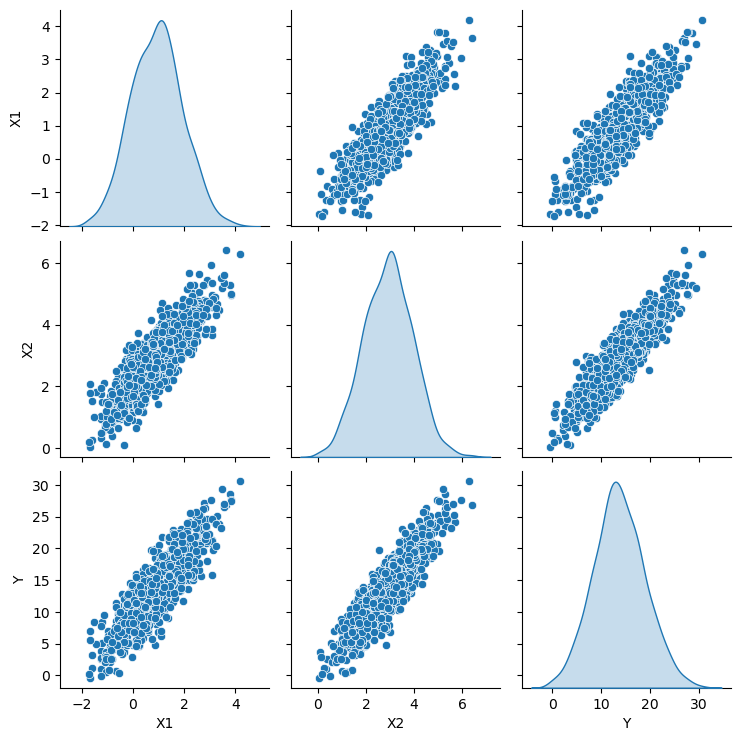

In [29]:
correlated_predictors(1,3,.85, sample_size, only_plot_pairs=True)

### Fit a linear regression for y ~ x1 + x2 . How well does it fit? Do its assumptions hold?

- What are the intercept and coefficients from the model? Are they what you expect? 
    * The model explains 86.7% variance in the `ys` variable and the model is statistically significant as well.
    * The predicted values for the parameters are as below:
        - `x1` --> 1.9533 with standard error 0.120. The actual value is 2
        - `x2` --> 3.0535 with standard error 0.120. The actual value is 3
        - `intercept` --> 2.9186 with standard error 0.272. The actual value is 3<br>
        
      The predicted values for `x1 and x2` are quite close to the actual values and all the predicted parameters are statistically significant. The intecept predicted value is quite far from the actual value with significantly higher standard error as well. This might be an indication for that model shows dependency on `x1 & x2` more rather than the intecept
    
<br>

- Check the model assumptions — do they hold?
    * As the residuals in _'Q-Q Plot'_ are deviated from the diagonal, it seems like the residuals are not normally distributed. Hence, the assumption of Residuals are Normally distributed fails to hold.
    * There are some outliers in _'Residuals vs Fitted'_ plot however other than this, no other observable trend is seen. It seems like the Homoscedasticity assumption holds well
<br>


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     3239.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:19:14   Log-Likelihood:                -2097.5
No. Observations:                1000   AIC:                             4201.
Df Residuals:                     997   BIC:                             4216.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9186      0.272     10.720      0.0

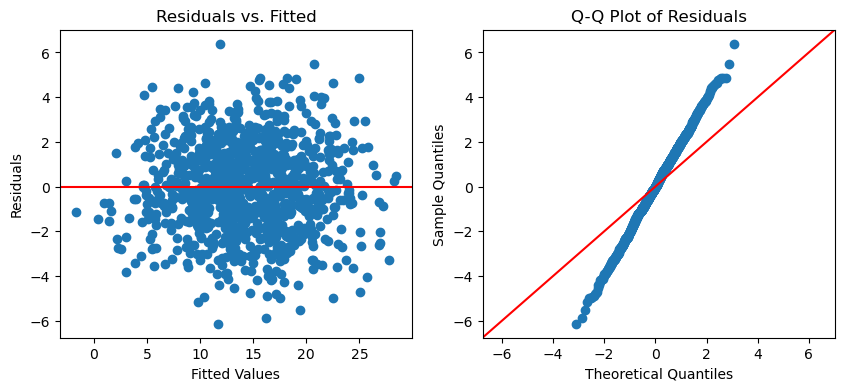

In [30]:
correlated_predictors(1,3,.85, sample_size, is_single_run=True)

### Run this simulation (drawing 1000 variables and fitting a linear model) 100 times. Show the mean, variance, and appropriate distribution plots of the estimated intercepts and coefficients (for x1 and x2)

- Below graphs show the distribution of the coefficients of `X1 & X2` and the `intercept`. The distribution shows significantly higher variance in the `intercept` as compare to `X1 & X2`

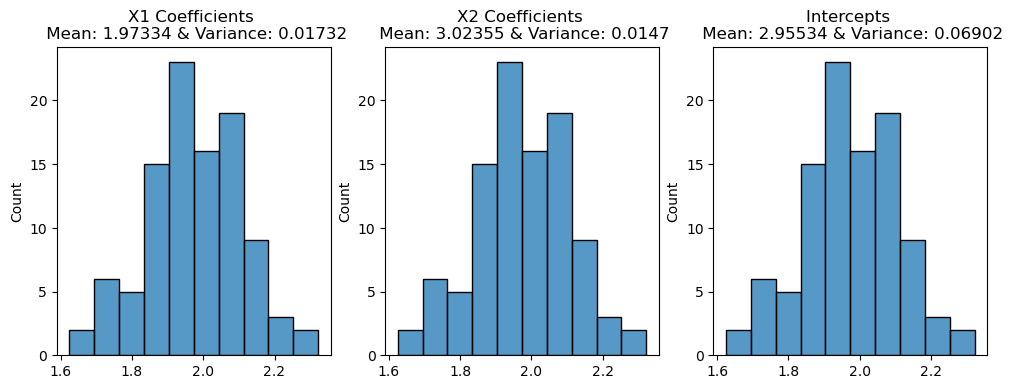

In [31]:
x1_coeffs = []
x2_coeffs = []
intercepts = []

for i in range(100):
    x1_coeff_pred, x2_coeff_pred, intercept_pred = correlated_predictors(1,3,.85, sample_size)
    
    x1_coeffs.append(x1_coeff_pred)
    x2_coeffs.append(x2_coeff_pred)
    intercepts.append(intercept_pred)
    
x1_pred_mean = round(np.mean(x1_coeffs), 5)
x1_pred_var = round(np.square(np.std(x1_coeffs)), 5)

x2_pred_mean = round(np.mean(x2_coeffs), 5)
x2_pred_var = round(np.square(np.std(x2_coeffs)), 5)

intercept_mean = round(np.mean(intercepts), 5)
intercept_var = round(np.square(np.std(intercepts)), 5)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.histplot(x1_coeffs, ax=axes[0])
axes[0].set_title(f'X1 Coefficients \n Mean: {x1_pred_mean} & Variance: {x1_pred_var}')

sns.histplot(x1_coeffs, ax=axes[1])
axes[1].set_title(f'X2 Coefficients \n Mean: {x2_pred_mean} & Variance: {x2_pred_var}')

sns.histplot(x1_coeffs, ax=axes[2])
axes[2].set_title(f'Intercepts \n Mean: {intercept_mean} & Variance: {intercept_var}')
plt.show()

### Repeat the repeated simulation for a variety of different covariances from 0 to 1 (including at least 0, 0.9, 0.99, and 0.999). Create line plots (or a single line plot with multiple colors) that show how the variance of the estimated regression parameters (intercept and $x_1$ and $x_2$ coefficients) change as you increase the correlation (covariance) between $X_1$ and $X_2$.

- From the below graph, it's also clearly evident that the `intercept` has the highest variance compared `X1 & X2` and is quite sensitive to the covariance between `X1 & X2`.
- It seems like the variance in all the predicted parameters is less for covariance values between [0.20 0.80]

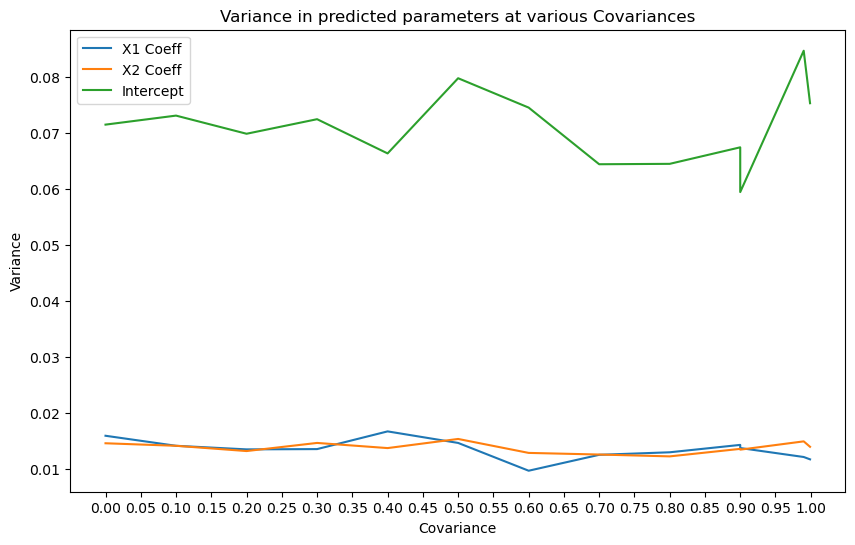

In [32]:
cov_plot_dict = {}
cov_plot_dict['covariance'] = []
cov_plot_dict['x1_variance'] = []
cov_plot_dict['x2_variance'] = []
cov_plot_dict['intercept'] = []

base_case = [0,0.9,.99,0.999]
for cov in base_case:
    cov_plot_dict['covariance'].append(cov)
    temp_x1 = []
    temp_x2 = []
    temp_intercept = []
    
    for i in range(100):
        x1_coeff_pred, x2_coeff_pred, intercept_pred = correlated_predictors(1,3,.85, sample_size)
        temp_x1.append(x1_coeff_pred)
        temp_x2.append(x2_coeff_pred)
        temp_intercept.append(intercept_pred)
    
    cov_plot_dict['x1_variance'].append( round(np.square(np.std(temp_x1)),5) )
    cov_plot_dict['x2_variance'].append( round(np.square(np.std(temp_x2)),5) )
    cov_plot_dict['intercept'].append( round(np.square(np.std(temp_intercept)),5) )

start = 0.10
end = .95
step = 0.10

next_covs = []

current = start
while current <= end:
    next_covs.append(current)
    current += step
    
for cov in next_covs:
    cov_plot_dict['covariance'].append(cov)
    temp_x1 = []
    temp_x2 = []
    temp_intercept = []
    
    for i in range(100):
        x1_coeff_pred, x2_coeff_pred, intercept_pred = correlated_predictors(1,3,.85, sample_size)
        temp_x1.append(x1_coeff_pred)
        temp_x2.append(x2_coeff_pred)
        temp_intercept.append(intercept_pred)
    
    cov_plot_dict['x1_variance'].append( round(np.square(np.std(temp_x1)),5) )
    cov_plot_dict['x2_variance'].append( round(np.square(np.std(temp_x2)),5) )
    cov_plot_dict['intercept'].append( round(np.square(np.std(temp_intercept)),5) )
    

df_plot = pd.DataFrame(cov_plot_dict).sort_values(by='covariance')

plt.figure(figsize=(10, 6))
sns.lineplot(x="covariance", y="x1_variance", data=df_plot, label="X1 Coeff")
sns.lineplot(x="covariance", y="x2_variance", data=df_plot, label="X2 Coeff")
sns.lineplot(x="covariance", y="intercept", data=df_plot, label="Intercept")
plt.xlabel("Covariance")
plt.ylabel("Variance")
plt.title("Variance in predicted parameters at various Covariances")
plt.legend()
plt.xticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00])
plt.show()

- If I include covariance = 1
    * The variance for the all the 3 parameters was decreasing till 0.999 however at 1, I see a sudden rise.
    * The covariance 1 means the model is still significant, however the predicted parameters are not significant at all. It seems like, if the model will fit `Y` with either `X1 or X2` only but both makes the parameter values insignificant

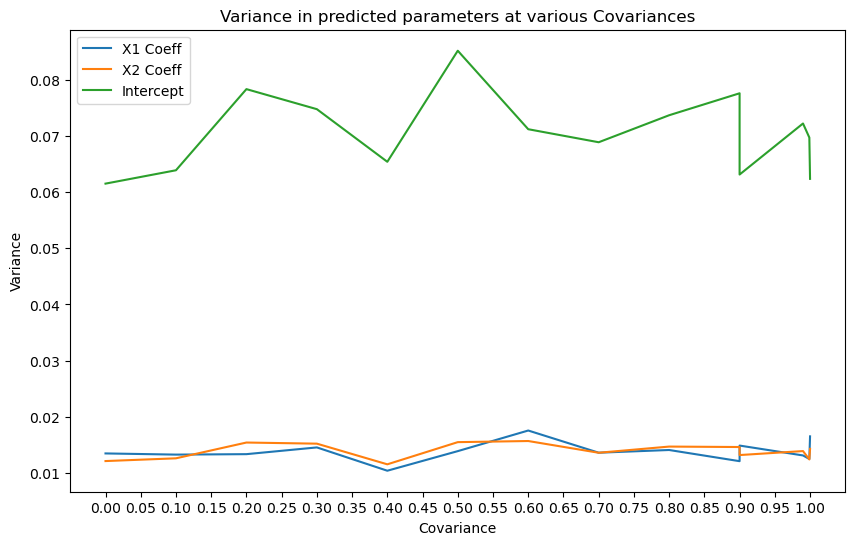

In [33]:
cov_plot_dict = {}
cov_plot_dict['covariance'] = []
cov_plot_dict['x1_variance'] = []
cov_plot_dict['x2_variance'] = []
cov_plot_dict['intercept'] = []

base_case = [0,0.9,.99,0.999]
for cov in base_case:
    cov_plot_dict['covariance'].append(cov)
    temp_x1 = []
    temp_x2 = []
    temp_intercept = []
    
    for i in range(100):
        x1_coeff_pred, x2_coeff_pred, intercept_pred = correlated_predictors(1,3,.85, sample_size)
        temp_x1.append(x1_coeff_pred)
        temp_x2.append(x2_coeff_pred)
        temp_intercept.append(intercept_pred)
    
    cov_plot_dict['x1_variance'].append( round(np.square(np.std(temp_x1)),5) )
    cov_plot_dict['x2_variance'].append( round(np.square(np.std(temp_x2)),5) )
    cov_plot_dict['intercept'].append( round(np.square(np.std(temp_intercept)),5) )

start = 0.10
end = 1
step = 0.10

next_covs = []

current = start
while current <= end:
    next_covs.append(current)
    current += step
    
for cov in next_covs:
    cov_plot_dict['covariance'].append(cov)
    temp_x1 = []
    temp_x2 = []
    temp_intercept = []
    
    for i in range(100):
        x1_coeff_pred, x2_coeff_pred, intercept_pred = correlated_predictors(1,3,.85, sample_size)
        temp_x1.append(x1_coeff_pred)
        temp_x2.append(x2_coeff_pred)
        temp_intercept.append(intercept_pred)
    
    cov_plot_dict['x1_variance'].append( round(np.square(np.std(temp_x1)),5) )
    cov_plot_dict['x2_variance'].append( round(np.square(np.std(temp_x2)),5) )
    cov_plot_dict['intercept'].append( round(np.square(np.std(temp_intercept)),5) )
    

df_plot = pd.DataFrame(cov_plot_dict).sort_values(by='covariance')

plt.figure(figsize=(10, 6))
sns.lineplot(x="covariance", y="x1_variance", data=df_plot, label="X1 Coeff")
sns.lineplot(x="covariance", y="x2_variance", data=df_plot, label="X2 Coeff")
sns.lineplot(x="covariance", y="intercept", data=df_plot, label="Intercept")
plt.xlabel("Covariance")
plt.ylabel("Variance")
plt.title("Variance in predicted parameters at various Covariances")
plt.legend()
plt.xticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00])
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     3038.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:19:20   Log-Likelihood:                -2112.3
No. Observations:                1000   AIC:                             4231.
Df Residuals:                     997   BIC:                             4245.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.754e+06   1.54e+07      0.308      0.7

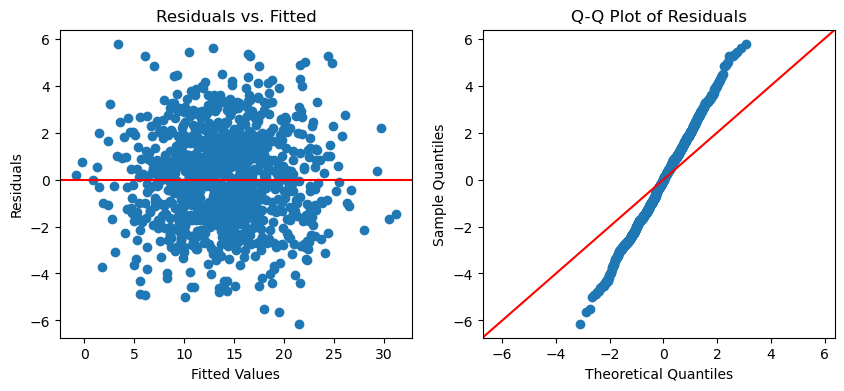

In [34]:
correlated_predictors(1,3,1, sample_size, is_single_run=True)

# Reflection (5%)

This assignment was quite exhaustive about Linear Regression and validating whether the assumptions of the linear regression holds or not for the fitted model. From the various model fitted in this assignment, I learnt that even if the model seemes to fit perfectly and explains majority of the variances in the dependent variable, still the Linear Regression might not be suitable model as the model may be violating the fundamental assumptions of the Linear Regression. So, it becomes imperative to look at the various output graphs/output such as _Q-Q Plot_, _Residuals vs Fitted Plot_ to validate whether we can use the Linear Regression or not.

From this work, I also learnt how to use and generate the random variables from a given distribution and the importance of the seed. If I need to make the results reproducible, it's very important to provide a seed.

Also, I thought I would take maybe slightly more time as mentioned in the assignment, however I think I end up spending ~20 hours in this assignment almost double the said time. 